<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [141]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

#### Load the Life expectancy dataset and display the first five records 

In [43]:
# load the csv file

# type your code here

# display the first five observations

# type your code here
# load the csv file
df_lifeExp = pd.read_csv('D:\\DataScience\\Material\\SLR\\Day 3-2\\Day 3\\Life_Expectancy.csv')

# display the first two observations
df_lifeExp.head(2)

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.000000,62,0.010000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,2015,Developing,74.000000,0,4.600000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000


#### Check the shape of the data and display its information

In [75]:
# check the size of the dataframe
df_lifeExp.shape
# type your code here

(173, 19)

In [14]:
# display dataset information understand the dataset
df_lifeExp.info()
# type your code here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
df_lifeExp.Life_Expectancy.isnull().sum()

9

In [ ]:
na_data = df_lifeExp.Life_Expectancy.isnull() 

# obtain a list of all records where indicating value is true 
na_data.index[na_data == True].tolist()

In [ ]:
# drop all the records for which target variable information is missing by index
df_lifeExp = df_lifeExp.drop(df_lifeExp.index[[46, 100, 104, 111, 118, 122, 135, 138, 168]])

# find total number of missing values in column 'Life_Expectancy'
df_lifeExp.Life_Expectancy.isnull().sum()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
df_lifeExp.shape

(173, 20)

In [63]:
Total=df_lifeExp.isnull().sum().sort_values(ascending=False) 
Pertentage=(df_lifeExp.isnull().sum()*100/df_lifeExp.isnull().count()).sort_values(ascending=False) 
missing_data=pd.concat([Total,Pertentage],axis=1,keys=['Total', 'Percent'])
missing_data

#Drop value Alcohol
df_lifeExp=df_lifeExp.drop(['Alcohol'],axis=1)

In [122]:
df_lifeExp = df_lifeExp.drop("Infant_Deaths",axis=1)

In [69]:
missing_data[missing_data.Total>0]

,Total,Percent
Alcohol,166,95.953757
Population,34,19.653179
GDP,21,12.138728
Hepatitis B,9,5.202312
Income_Index,7,4.046243
Schooling,7,4.046243
Malnourished5_9,2,1.156069
Malnourished10_19,2,1.156069
BMI,2,1.156069


In [72]:
df_lifeExp['Population']=df_lifeExp['Population'].fillna(df_lifeExp['Population'].median())
df_lifeExp['GDP']=df_lifeExp['GDP'].fillna(df_lifeExp['GDP'].median())
df_lifeExp['Hepatitis B']=df_lifeExp['Hepatitis B'].fillna(df_lifeExp['Hepatitis B'].median())
df_lifeExp['Income_Index']=df_lifeExp['Income_Index'].fillna(df_lifeExp['Income_Index'].median())
df_lifeExp['Schooling']=df_lifeExp['Schooling'].fillna(df_lifeExp['Schooling'].median())
df_lifeExp['Malnourished5_9']=df_lifeExp['Malnourished5_9'].fillna(df_lifeExp['Malnourished5_9'].median())
df_lifeExp['Malnourished10_19']=df_lifeExp['Malnourished10_19'].fillna(df_lifeExp['Malnourished10_19'].median())
df_lifeExp['BMI']=df_lifeExp['BMI'].fillna(df_lifeExp['BMI'].median())

In [77]:
Total=df_lifeExp.isnull().sum().sort_values(ascending=False)
Total

Life_Expectancy      0
Underfive_Deaths     0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Polio                0
Schooling            0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Country              0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [87]:
# Redundant-same value in the column 
df_lifeExp.shape
df_lifeExp.describe(include =['object'])

,Country,Status
count,173,173
unique,173,2
top,Vanuatu,Developing
freq,1,141


In [ ]:
df_lifeExp=df_lifeExp.drop('Country',axis=1)

In [96]:
df_lifeExp.describe()

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2014.988439,149.971098,22.872832,82.716763,1559.208092,43.554913,30.352601,83.040462,84.508671,0.647399,6764.134560,11495543.120000,4.492486,4.539306,0.697058,13.002023,72.007514
std,0.152057,95.679846,84.268577,24.066903,8055.443243,20.394534,108.428722,24.833951,22.687364,1.361795,11095.340318,26243631.765917,4.131178,4.217814,0.150883,2.880010,8.032405
min,2013.000000,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,2966.000000,0.100000,0.100000,0.347000,4.900000,51.000000
25%,2015.000000,74.000000,0.000000,81.000000,0.000000,24.400000,0.000000,84.000000,84.000000,0.100000,918.677154,587482.000000,1.500000,1.500000,0.576000,11.100000,66.200000
50%,2015.000000,137.000000,2.000000,93.000000,16.000000,51.100000,3.000000,93.000000,94.000000,0.100000,3124.343999,5243669.000000,3.300000,3.300000,0.731000,13.150000,74.100000
75%,2015.000000,199.000000,17.000000,97.000000,212.000000,61.600000,21.000000,97.000000,97.000000,0.300000,6461.192554,11495543.120000,6.400000,6.400000,0.798000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,66346.522670,258162113.000000,26.700000,27.300000,0.948000,20.400000,88.000000


In [97]:
df_lifeExp=df_lifeExp.drop('Year',axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [131]:
# type your code here
#get Dummies
df_lifeExp['Status']=pd.get_dummies(df_lifeExp['Status'],drop_first=True)
df_lifeExp.Status.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: uint8

In [132]:
df_lifeExp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 181
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Status             173 non-null    uint8  
 1   Adult_Mortality    173 non-null    float64
 2   Hepatitis B        173 non-null    float64
 3   Measles            173 non-null    int64  
 4   BMI                173 non-null    float64
 5   Underfive_Deaths   173 non-null    int64  
 6   Polio              173 non-null    int64  
 7   Diphtheria         173 non-null    int64  
 8   HIV                173 non-null    float64
 9   GDP                173 non-null    float64
 10  Population         173 non-null    float64
 11  Malnourished10_19  173 non-null    float64
 12  Malnourished5_9    173 non-null    float64
 13  Income_Index       173 non-null    float64
 14  Schooling          173 non-null    float64
 15  Life_Expectancy    173 non-null    float64
dtypes: float64(11), int64(4), 

<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [126]:
X.head()

,const,Status,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling
0,1.000000,1,263.000000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000
1,1.000000,1,74.000000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000
2,1.000000,1,19.000000,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000
3,1.000000,1,335.000000,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000
4,1.000000,1,13.000000,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,11495543.120000,3.300000,3.300000,0.784000,13.900000


In [133]:
X=df_lifeExp.iloc[:,:15]
X=sm.add_constant(X)
y=df_lifeExp['Life_Expectancy']
x_train,x_test,y_train,y_test=train_test_split(y,X,test_size=0.2,random_state=10)
MLR_model=sm.OLS(y_train,x_train).fit()
MLR_model.summary()

ValueError: shapes (138,16) and (138,16) not aligned: 16 (dim 1) != 138 (dim 0)

In [9]:
# select the independent variables
X = df_lifeExp.iloc[:,:15]

# to estimate the regression coefficient , a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

# build a model with an intercept
MLR_model = sm.OLS(y_train, X_train).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [148]:
# type your code here
X = df_lifeExp.iloc[:,[2,6,7]]
Y=df_lifeExp['Life_Expectancy']
regeressor=LinearRegression()
MLR=regeressor.fit(X,Y)
y_pred=MLR.predict(X)

In [151]:
#Residual
residual=np.array(Y-y_pred)
residual

#Unexplained Variation
np.sum(residual**2)

7272.464916334295

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [161]:
# type your code here
df_lifeExp.head()
X=df_lifeExp.iloc[:,[11,12]]
y=df_lifeExp.Life_Expectancy
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)
MLR=sm.OLS(y_train,sm.add_constant(x_train)).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     19.66
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           3.20e-08
Time:                        16:04:07   Log-Likelihood:                -466.03
No. Observations:                 138   AIC:                             938.1
Df Residuals:                     135   BIC:                             946.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.3070      0.916     83.320      0.000      74.496      78.118
Malnourished10_19    -0.5024      0.769     -0.654      0.514      -2.023       1.018
Malnourished5_9      -0.3930      0.754     -0.521      0.603      -1.884       1.098
==============================================================================
Omnibus:                        6.049   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.225
Skew:                          -0.512   Prob(JB):                       0.0445
Kurtosis:                       2.820   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

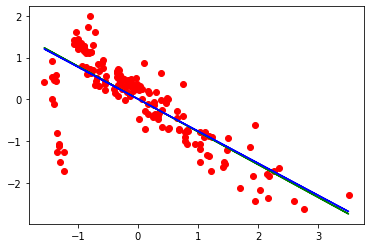

In [194]:
# type your code here
df_lifeExp.head()
x=df_lifeExp['Adult_Mortality'].values
X = x.reshape(-1,1)
Y=df_lifeExp['Life_Expectancy']
X_scaler = StandardScaler()
X=X_scaler.fit_transform(X)
y = (Y - Y.mean()) / Y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
linreg = LinearRegression()
MLR_model=linreg.fit(X_train,y_train)
lin_pred = MLR_model.predict(X_train)
lin_pred

sgd = SGDRegressor(random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# predict the values of target variable using entire data
sgd_pred = linreg_with_SGD.predict(X_train)

plt.scatter(X,y,color='red')
plt.plot(X_train,lin_pred,color='green',label='Linear Regression')
plt.plot(X_train,sgd_pred,color='blue',label='SGD')
plt.show()

In [170]:
df_lifeExp['Adult_Mortality'].describe()

count   173.000000
mean    149.971098
std      95.679846
min       1.000000
25%      74.000000
50%     137.000000
75%     199.000000
max     484.000000
Name: Adult_Mortality, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [195]:
# type your code here
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [204]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
y_pred=MLR_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
print(mse_train)
rmse_train = round(np.sqrt(mse_train), 4)
print(rmse_train)
test_pred = MLR_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
print(mse_test)
rmse_test = round(np.sqrt(mse_test), 4)
print(rmse_test)

6.81944523340631
2.6114
12.860917349526845
3.5862


In [206]:
r_square = MLR_model.score(X_train, y_train)
adj_r_square = 1 - ((1-r_square)*(172)/(173-16-1))
print("The R-squared value is", r_square, "and the adjusted R-squared", adj_r_square )

The R-squared value is 0.8948120402919989 and the adjusted R-squared 0.8840235316039988


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

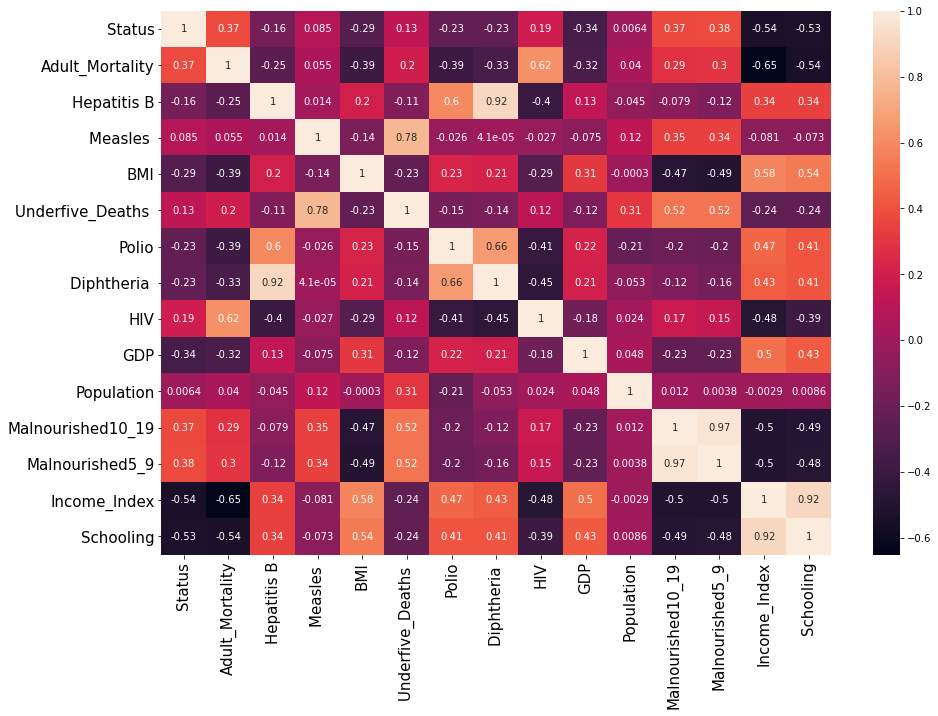

In [207]:
# type your code here
# set dimensions for the plot figure
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)

# create a copy of dataframe
df_features = df_lifeExp.iloc[:,:15]

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_features.corr(), annot = True, annot_kws = {"size": 10})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df_lifeExp.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.000000,62,0.010000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,2015,Developing,74.000000,0,4.600000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,Algeria,2015,Developing,19.000000,21,nan,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,2015,Developing,335.000000,66,nan,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,Antigua,2015,Developing,13.000000,0,nan,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,nan,3.300000,3.300000,0.784000,13.900000,76.400000


In [20]:
#df_lifeExp.drop(columns='Country')
df_lifeExp.reset_index()
df_lifeExp=df_lifeExp.drop(columns=['Country','Year'],axis=1)

In [21]:
# Perform Ridge regression

# selecting the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initializing the standard scalar
X_scaler = StandardScaler()

# standardizing all the columns of df_ipl
X = X_scaler.fit_transform(X)

# standardizing the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

NameError: name 'StandardScaler' is not defined

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here

<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here